# Assignment 1

In [101]:
!pip install wordcloud -q
!pip install autocorrect


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     -------------------------------------- 622.8/622.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=0741a6a60f8d9d43246271df1678958b040f8a7cf50e741684a2846f21a9d9a5
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\ab\0f\23\3c010c3fd877b962146e7765f9e9b08026cac8b035094c5750
Successfully built autocorrect



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [141]:
import re
import pandas as pd
import nltk
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
nltk.download("stopwords")
nltk.download("words")
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
df = pd.read_csv("A1_dataset.csv")

In [7]:
df.head()

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...


In [8]:
from customregexes import *

---

### II) Text Preprocessing

In [129]:
special_tokens = ['@user', '@url']

In [9]:
from nltk.tokenize import TweetTokenizer

def tokenization(text):
    twt_tk = TweetTokenizer()
    return twt_tk.tokenize(text)

In [80]:
from nltk.corpus import wordnet as wn
wordnet_words = []
for word in wn.words():
    wordnet_words.append(word)

# from nltk.corpus import words
# wrd = words.words()

words = set(wordnet_words)

In [82]:
'helluo' in words

False

In [112]:
# Can use Jaccard distance or edit distance to do this
from nltk.metrics.distance import jaccard_distance, edit_distance

# Spelling correction using jaccard distance
def spelling_correction_jaccard(text):
    res = []
    for curr in text:
        if curr not in words:
            crrct_words = []
            for w in words:
                crrct_words.append([jaccard_distance(set(w), set(curr)), w])
            crrct_words = sorted(crrct_words, key = lambda x: x[0])
            res.append(crrct_words[0][1][0])
        else:
            res.append(curr)
    return res

# Spelling correction using edit distance
def spelling_correction_edit(text):
    res = []
    for curr in text:
        if curr not in words:
            crrct_words = []
            for w in words:
                crrct_words.append([edit_distance(w, curr), w])
            crrct_words = sorted(crrct_words, key = lambda x: x[0])
            res.append(crrct_words[0][1])
        else:
            res.append(curr)
    return res

# Spelling correction using edit distance
def spelling_correction_autocorrect(text):
    spell = Speller()
    res = []
    for curr in text:
        if curr not in words:
            res.append(spell(curr))
        else:
            res.append(curr)
    return res

def spelling_correction(text, method ='autocorrect'):
    if method == 'autocorrect':
        return spelling_correction_autocorrect(text)
    elif method == 'edit_distance':
        return spelling_correction_edit(text)
    elif method == 'jaccard':
        return spelling_correction_jaccard(text)
    else:
        raise ValueError('Please use a valid method')

In [130]:
spelling_correction(["helllo", "good"])

['hello', 'good']

In [12]:
#Here we can either do lemmatization or stemming, doing both at the same time will not be useful

from nltk.stem import WordNetLemmatizer, PorterStemmer

def lemmatization_text(text):
    wn = WordNetLemmatizer()
    lemmatized_text = []
    for each in text:
        lemmatized_word = wn.lemmatize(each)
        lemmatized_text.append(lemmatized_word)
    return ' '.join(lemmatized_text)

def stemming_text(text):
    stemmed_text = []
    ps = PorterStemmer()
    for each in text:
        stemmed_word = ps.stem(each)
        stemmed_text.append(stemmed_word)
    return ' '.join(stemmed_text)

In [13]:
lemmatization_text(["dogs", "becomes"]), stemming_text(["dogs", "becomes"])

('dog becomes', 'dog becom')

In [17]:
import string

def remove_punctuations(text):
    puncts = string.punctuation
    s = ""
    for i in text:
        if i not in puncts:
            s += i
    return s

In [18]:
print("Punctuations: ", string.punctuation)
remove_punctuations("lesgoooo!!!!!?!??!! whooohooo!")

Punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'lesgoooo whooohooo'

In [210]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append("i'm")
def remove_stopwords(text):
    pattern = re.compile(r'\b(' + (r'|'.join(stop_words)) + r')\b\s*')
    return pattern.sub('', text)

In [22]:
remove_stopwords("the is when am i the when the when name is neemesh aflah")

'name neemesh aflah'

In [23]:
def remove_whitespaces(text):
    return re.sub(r'\s*\s', ' ', text)

In [24]:
remove_whitespaces("whoa a    s f")

'whoa a s f'

In [131]:
def remove_url_html(text):
    urls = findURLs(text)
    for i in urls:
        text = re.sub(f"{i}", "@url", text)
    return text

In [132]:
def remove_users(text):
    username = findUsernames(text)
    for i in username:
        text = re.sub(f"{i}", "@user", text)
    return text

In [133]:
def lowercase_text(text):
    return lowercase(text)

In [119]:
remove_url_html('Something so beautiful I want to share with my tweeter friends  http://www.spiritisup.com/ahuginyourinboxgmb.html')

'something so beautiful i want to share with my tweeter friends  '

In [139]:
# Here we prefer to perform lemmatization over stemming so that the words don't lose their inherent meaning
# and we perform spelling correction using the edit_distance metric in nltk, this is mainly because of the results shown above
# comparing the jaccard distance and the edit distance method.

def preprocess_text(text):
    text = lowercase_text(text)
    text = remove_url_html(text)
    text = remove_users(text)
    text = remove_stopwords(text)
    text = remove_punctuations(text)
    text = remove_whitespaces(text)
    text = tokenization(text)
    text = spelling_correction(text)
    text = lemmatization_text(text)
    return text

In [200]:
preprocess_text('Something so beautiful I want @Aflah to share with my tweeter friends  http://www.spiritisup.com/ahuginyourinboxgmb.html')

'something beautiful want user share tweeter friend user'

In [142]:
df["PREPROCESSED_TEXT"] = df["TEXT"].progress_apply(lambda row: preprocess_text(row))

  0%|          | 0/4287 [00:00<?, ?it/s]

In [162]:
df

,LABEL,DATE_TIME,TEXT,PREPROCESSED_TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared,get threaded scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...,user like sedan mango one yesterday
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,worked car work showing going bed sooooooooooo...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...,user actually start afternoon try something we...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...,user www giant worrywell vote nonstop col love...
...,...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock,user performance clip test shock
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on...",gh rcn true blood episode demand 1013
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merch...,returned forest sarah mercy lost key wood day
4285,1,Sun Jun 07 02:09:46 2009,is proud of her dad and his piece of work. ( h...,proud dad piece work user keep papa


In [196]:
df.isna().sum(axis=0)

LABEL                0
DATE_TIME            0
TEXT                 0
PREPROCESSED_TEXT    0
dtype: int64

In [197]:
df.to_csv('PreProcessed.csv')

In [198]:
df2 = pd.read_csv('PreProcessed.csv')

In [199]:
df2 = df2.fillna("")

---

### III) Visualization

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#### a) Word Clouds of both classes

In [177]:
positive_preprocessed_text = df["PREPROCESSED_TEXT"][df.LABEL==1]
negative_preprocessed_text = df["PREPROCESSED_TEXT"][df.LABEL==0]

In [178]:
positive_preprocessed_text = ' '.join(positive_preprocessed_text.values)

In [179]:
wordcloud = WordCloud(width = 1500, height = 720,
                background_color ='black',
                min_font_size = 10).generate(positive_preprocessed_text)

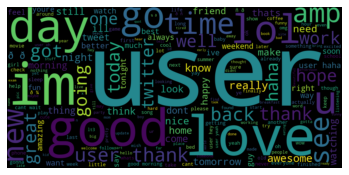

In [180]:
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [181]:
negative_preprocessed_text = ' '.join(negative_preprocessed_text.values)

In [182]:
wordcloud = WordCloud(width = 1500, height = 720,
                background_color ='black',
                min_font_size = 10).generate(negative_preprocessed_text)

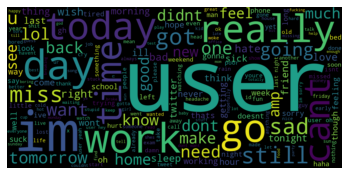

In [183]:
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

#### b) Comparing both Word Clouds

---

### IV) Rule-Based Sentiment Analysis

In [184]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#### a) Retrieving Class Label for every instance

In [185]:
sid = SentimentIntensityAnalyzer()

In [186]:
def retrieve_label(y_pred):
    label = int(y_pred["pos"] >= y_pred["neg"])
    return label

In [188]:
sid.polarity_scores("I hate h")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}

##### i) On preprocessed text

In [189]:
prptext_labels = []
for each_text in df["PREPROCESSED_TEXT"].values:
    sentiment_pred = sid.polarity_scores(each_text)
    prptext_labels.append(retrieve_label(sentiment_pred))
prptext_labels = np.array(prptext_labels)

##### ii) On raw text

In [190]:
rawtxt_labels = []
for each_text in df["TEXT"].values:
    sentiment_pred = sid.polarity_scores(each_text)
    rawtxt_labels.append(retrieve_label(sentiment_pred))
rawtxt_labels = np.array(rawtxt_labels)

#### b) Get accuracy scores

In [191]:
y = df["LABEL"].values

In [192]:
def get_accuracy(y_preds, y):
    no_instances = len(y)
    return sum(y_preds==y)/no_instances

##### i) Of preprocessed text

In [193]:
print("The accuracy score of labels calculated on the preprocessed text is: ", get_accuracy(prptext_labels, y))

The accuracy score of labels calculated on the preprocessed text is:  0.6641007697690693


##### ii) Of raw text

In [194]:
print("The accuracy score of labels calculated on the raw text is: ", get_accuracy(rawtxt_labels, y))

The accuracy score of labels calculated on the raw text is:  0.6846279449498484
